<a href="https://colab.research.google.com/github/pratikshitvas/GDP-prediction_mutiple_models/blob/main/GDP_Dataset_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


In [ ]:
data = pd.read_csv('edited_Copy of PANEL data for regression (GDP, X and M as Variables).csv')
data.head()

,COUNTRY ID,COUNTRY,YEAR,GDP,EXPORTS,IMPORTS
0,1,Afghanistan,1970,1731.44,85.57,114.0
1,1,Afghanistan,1971,1812.84,99.65,141.0
2,1,Afghanistan,1972,1647.90,122.47,164.0
3,1,Afghanistan,1973,1702.72,143.21,172.0
4,1,Afghanistan,1974,2061.73,230.00,243.0


In [ ]:
data.COUNTRY = [s.strip() for s in data.COUNTRY]

In [ ]:
country_names = list(data.COUNTRY.unique())
#country_names

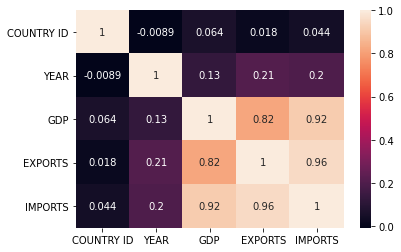

In [ ]:
sns.heatmap(data.corr(), annot=data.corr())

In [ ]:
def item_counter(df,split_features,unique_attributes):
    lst = []
    for i in unique_attributes:
        item = df.loc[df[split_features]==i]
        lst.append(item)
    return lst

In [ ]:
country_wize_list = item_counter(data,'COUNTRY',country_names)
#print('\n\n'.join('{}' for _ in range(len(country_wize_list))).format(*country_wize_list))

In [ ]:
print(len(country_wize_list),len(country_names))

218 218


In [ ]:
type(country_wize_list[0])

pandas.core.frame.DataFrame

**linear regression**

In [ ]:
dictionary = {}
for i in country_names:
    for j in country_wize_list:
        if j.COUNTRY.unique() == i:
            model = LinearRegression().fit(j[['COUNTRY ID','YEAR','EXPORTS','GDP']],j.IMPORTS)
            dictionary[i] = model

In [ ]:
a = dictionary['Afghanistan']

In [ ]:
a.predict([[1,2020,6000.27,13000]])

array([4198.61963469])

In [ ]:
from sklearn.metrics import r2_score
for i in dictionary.keys():
    for j in country_wize_list:
        if j.COUNTRY.unique() == i:
            prediction = dictionary[i].predict(j[['COUNTRY ID','YEAR','EXPORTS','GDP']])
            print(r2_score(prediction,j.IMPORTS))

0.9677763124491325
0.9909720169640759
0.9620855768291193
0.9453680398080598
0.9556051325339159
0.8954464460288951
0.92330314244953
0.9854233969152965
0.973928211196585
0.9867321827535122
0.9945468551572096
0.9986713386337878
0.9434387914022008
0.9268155848906559
0.936644416216757
0.9943796289551627
0.9765567009166269
0.9903966150992184
0.9989943836593449
0.9880805806038526
0.9834565746896581
0.9477891787960824
0.9699836346489366
0.9942727375010915
0.9681327786279158
0.9371725695036079
0.9844909011223757
0.8968503969807518
0.8466331711130735
0.9692578988202087
0.974548578133882
0.93374131240795
0.9864769800508606
0.9939814087017513
0.9505392677526285
0.996780866359228
0.9829170837308793
0.7414778831603814
0.9348760592245292
0.9881043955993156
0.9942880902140545
0.9981827327037025
0.9872310325510467
0.995474010402662
0.9897004024351518
0.8792691516299146
0.6555797149245888
0.9240987013791727
0.9629827154203251
0.9902885673042042
0.9571058759023675
0.9676328240416701
0.8800715416010361
0.

**PRIDECTING imports USING ONLY GDP**

In [ ]:
dictionary_1 = {}
for i in country_names:
    for j in country_wize_list:
        if j.COUNTRY.unique() == i:
            model = LinearRegression().fit(j[['COUNTRY ID','YEAR','GDP']],j.IMPORTS)
            dictionary_1[i] = model

In [ ]:
a = dictionary_1['Afghanistan']

In [ ]:
a.predict([[1,2020,600.27]])

array([145.81541156])

**PREDICTING IMPORTS using exports**

In [ ]:
dictionary_2= {}
for i in country_names:
    for j in country_wize_list:
        if j.COUNTRY.unique() == i:
            model = LinearRegression().fit(j[['COUNTRY ID','YEAR','EXPORTS']],j.IMPORTS)
            dictionary_2[i] = model

In [ ]:
a = dictionary_2['Afghanistan']

In [ ]:
a.predict([[1,1997,400.27]])

array([2708.96532523])

**PREDICTING EXPORTS**

In [ ]:
dictionary_E= {}
for i in country_names:
    for j in country_wize_list:
        if j.COUNTRY.unique() == i:
            model = LinearRegression().fit(j[['COUNTRY ID','YEAR','IMPORTS','GDP']],j.EXPORTS)
            dictionary_E[i] = model

In [ ]:
a = dictionary_E['Afghanistan']

In [ ]:
a.predict([[1,2020,6000.27,13000]])

array([414.76265317])

**EXPORTS USING GDP ONLY**

In [ ]:
dictionary_G = {}
for i in country_names:
    for j in country_wize_list:
        if j.COUNTRY.unique() == i:
            model = LinearRegression().fit(j[['COUNTRY ID','YEAR','GDP']],j.EXPORTS)
            dictionary_G[i] = model

In [ ]:
a = dictionary_G['Afghanistan']

In [ ]:
a.predict([[1,2020,13000]])

array([438.04260836])

**EXPORTS USING IMPORTS**

In [ ]:
dictionary_I = {}
for i in country_names:
    for j in country_wize_list:
        if j.COUNTRY.unique() == i:
            model = LinearRegression().fit(j[['COUNTRY ID','YEAR','IMPORTS']],j.EXPORTS)
            dictionary_I[i] = model

In [ ]:
a = dictionary_G['Afghanistan']
a.predict([[1,2020,300]])

array([74.13399577])

In [ ]:
print('MAE:', metrics.mean_absolute_error(prediction,j.EXPORTS))
print('RMSE:', np.sqrt(metrics.mean_squared_error(prediction,j.EXPORTS)))
print('R2_Score: ', metrics.r2_score(prediction,j.EXPORTS))

MAE: 780.8954732276884
RMSE: 1101.5953302796327
R2_Score:  0.6632629789714419


***SVM(EXPORTS)***

In [ ]:
data.dtypes

COUNTRY ID      int64
COUNTRY        object
YEAR            int64
GDP           float64
EXPORTS       float64
IMPORTS       float64
dtype: object

In [ ]:
data['COUNTRY'].value_counts()

Lebanon                         50
Japan                           50
Guinea-Bissau                   50
Qatar                           50
Costa Rica                      50
                                ..
Montenegro                      12
Panama, excluding Canal Zone    11
Curaçao                          9
Sint Maarten (Dutch part)        9
Sudan                            8
Name: COUNTRY, Length: 218, dtype: int64

In [ ]:
x = data['GDP']
y = data['EXPORTS']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=4)
x_train.shape

(7595,)

In [ ]:
x_test.shape

(1899,)

In [ ]:
y_train.shape

(7595,)

In [ ]:
from sklearn import svm
svm.SVC(kernel='linear', gamma='auto', C=2)

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
x_train[:5]

6367    3653.86
3682    7939.74
1900     244.30
5480    1035.62
1922    6265.86
Name: GDP, dtype: float64

In [ ]:
y_train[:5]

6367     272.40
3682    1158.80
1900      71.76
5480     424.40
1922    1866.00
Name: EXPORTS, dtype: float64

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svm.SVR(kernel='linear', gamma='scale', C=2)

SVR(C=2, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
regressor=SVR(kernel='sigmoid',gamma = 'scale').fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
svm_pred = regressor.predict(np.array(x_test).reshape(-1,1))

In [ ]:
print(svm_pred)

[1814.72999962 2554.80738678 1770.55718389 ... 1770.7891716  1841.45890354
 1785.45380402]


In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, svm_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_pred)))
print('R2_Score: ', metrics.r2_score(y_test, svm_pred))

MAE: 37746.82001618292
RMSE: 133158.50451028094
R2_Score:  -0.07681505806731548


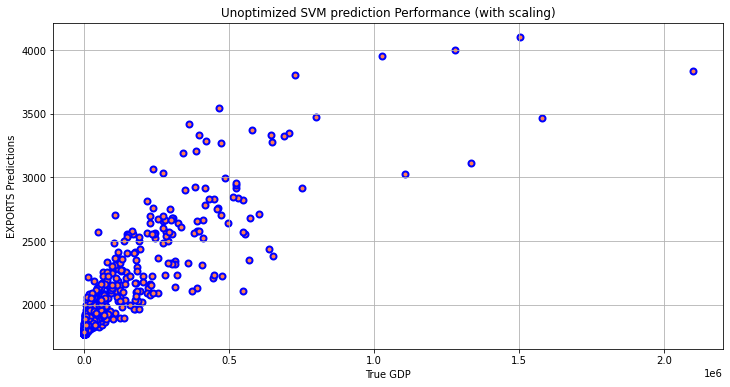

In [ ]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,svm_pred, linewidths=2, edgecolors='b', color='coral')
plt.xlabel('True GDP') 
plt.ylabel('EXPORTS Predictions') 
plt.title('Unoptimized SVM prediction Performance (with scaling)') 
plt.grid()
plt.show()

**using RBF**

In [ ]:

param_grid = {'C': [1, 10, 100], 'gamma': [0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=3)
grid.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.01, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=1, gamma=0.01, kernel=rbf, score=-0.063, total=   1.8s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=1, gamma=0.01, kernel=rbf, score=-0.061, total=   1.8s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.7s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=1, gamma=0.01, kernel=rbf, score=-0.068, total=   1.9s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=1, gamma=0.01, kernel=rbf, score=-0.086, total=   1.9s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=1, gamma=0.01, kernel=rbf, score=-0.056, total=   1.8s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=1, gamma=0.001, kernel=rbf, score=-0.063, total=   1.9s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=1, gamma=0.001, kernel=rbf, score=-0.061, total=   2.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=1, gamma=0.001, kernel=rbf, score=-0.068, total=   1.9s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=1, gamma=0.001, kernel=rbf, score=-0.086, total=   1.9s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=1, gamma=0.001, kernel=rbf, score=-0.056, total=   1.9s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=1, gamma=0.0001, kernel=rbf, score=-0.063, total=   2.1s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=1, gamma=0.0001, kernel=rbf, score=-0.061, total=   2.1s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=1, gamma=0.0001, kernel=rbf, score=-0.068, total=   2.1s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=1, gamma=0.0001, kernel=rbf, score=-0.086, total=   2.1s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=1, gamma=0.0001, kernel=rbf, score=-0.056, total=   2.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10, gamma=0.01, kernel=rbf, score=-0.063, total=   1.9s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10, gamma=0.01, kernel=rbf, score=-0.061, total=   1.8s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10, gamma=0.01, kernel=rbf, score=-0.068, total=   1.8s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10, gamma=0.01, kernel=rbf, score=-0.086, total=   1.9s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10, gamma=0.01, kernel=rbf, score=-0.056, total=   1.8s
[CV] C=10, gamma=0.001, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=10, gamma=0.001, kernel=rbf, score=-0.063, total=   2.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=10, gamma=0.001, kernel=rbf, score=-0.061, total=   1.9s
[CV] C=10, gamma=0.001, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=10, gamma=0.001, kernel=rbf, score=-0.068, total=   1.9s
[CV] C=10, gamma=0.001, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=10, gamma=0.001, kernel=rbf, score=-0.086, total=   1.9s
[CV] C=10, gamma=0.001, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=10, gamma=0.001, kernel=rbf, score=-0.056, total=   1.9s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=10, gamma=0.0001, kernel=rbf, score=-0.062, total=   2.1s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=10, gamma=0.0001, kernel=rbf, score=-0.060, total=   2.1s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=10, gamma=0.0001, kernel=rbf, score=-0.067, total=   2.1s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=10, gamma=0.0001, kernel=rbf, score=-0.084, total=   2.1s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=10, gamma=0.0001, kernel=rbf, score=-0.055, total=   2.1s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=100, gamma=0.01, kernel=rbf, score=-0.062, total=   1.9s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=100, gamma=0.01, kernel=rbf, score=-0.060, total=   1.9s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=100, gamma=0.01, kernel=rbf, score=-0.067, total=   1.9s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=100, gamma=0.01, kernel=rbf, score=-0.084, total=   1.9s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=100, gamma=0.01, kernel=rbf, score=-0.055, total=   1.9s
[CV] C=100, gamma=0.001, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=100, gamma=0.001, kernel=rbf, score=-0.058, total=   2.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=100, gamma=0.001, kernel=rbf, score=-0.057, total=   2.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=100, gamma=0.001, kernel=rbf, score=-0.063, total=   2.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=100, gamma=0.001, kernel=rbf, score=-0.079, total=   2.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=100, gamma=0.001, kernel=rbf, score=-0.052, total=   2.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=100, gamma=0.0001, kernel=rbf, score=-0.053, total=   2.2s
[CV] C=100, gamma=0.0001, kernel=rbf .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=100, gamma=0.0001, kernel=rbf, score=-0.051, total=   2.2s
[CV] C=100, gamma=0.0001, kernel=rbf .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=100, gamma=0.0001, kernel=rbf, score=-0.057, total=   2.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=100, gamma=0.0001, kernel=rbf, score=-0.070, total=   2.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=100, gamma=0.0001, kernel=rbf, score=-0.047, total=   2.2s


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.5min finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
grid.best_params_
grid.best_estimator_
grid_predictions = grid.predict(np.array(x_test).reshape(-1,1))

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, grid_predictions)))
print('R2_Score: ', metrics.r2_score(y_test, grid_predictions))

MAE: 36361.24018640337
RMSE: 132455.91487302986
R2_Score:  -0.06548175011196222


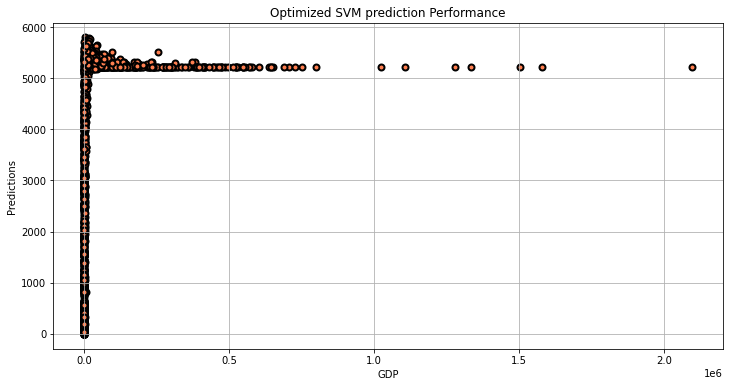

In [ ]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,grid_predictions,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('GDP') 
plt.ylabel('Predictions') 
plt.title('Optimized SVM prediction Performance') 
plt.grid()
plt.show()

**random forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [ ]:
y = data['EXPORTS']
X = data['GDP']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
sc_X = StandardScaler()

x1_train = sc_X.fit_transform(np.array(x_train).reshape(-1,1))
x1_test = sc_X.fit_transform(np.array(x_test).reshape(-1,1))
y1_train = y_train
y1_test = y_test

In [ ]:
rf1 = RandomForestRegressor(random_state=101, n_estimators=200)
rf2 = RandomForestRegressor(random_state=101, n_estimators=200)

rf1.fit((np.array(x_train).reshape(-1,1)), (np.array(y_train).reshape(-1,1)))
rf2.fit(x1_train, y1_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=101, verbose=0, warm_start=False)

In [ ]:
rf1_pred = rf1.predict(np.array(x_test).reshape(-1,1))
rf2_pred = rf2.predict(x1_test)

In [ ]:

print('Random Forest Performance:')


print('MAE:', metrics.mean_absolute_error(y_test, rf1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, rf1_pred))

print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y1_test, rf2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, rf2_pred)))
print('R2_Score: ', metrics.r2_score(y1_test, rf2_pred))

Random Forest Performance:
MAE: 21370.91131006776
RMSE: 88008.0933077725
R2_Score:  0.6679136640658603

selected features, No scaling:
MAE: 21746.430775637662
RMSE: 83181.83514848717
R2_Score:  0.703337414658167


optimization

In [ ]:
rf_param_grid = {'max_features': ['sqrt', 'auto'],
              'min_samples_leaf': [1, 3, 5],
              'n_estimators': [100, 500, 1000],
             'bootstrap': [False, True]}

In [ ]:
rf_grid = GridSearchCV(estimator= RandomForestRegressor(), param_grid = rf_param_grid,  n_jobs=-1, verbose=0)

In [65]:
rf_grid.fit((np.array(x_train).reshape(-1,1)),(np.array(y_train).reshape(-1,1)))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [70]:
rf_grid.best_params_
rf_grid.best_estimator_
rf_grid_predictions = rf_grid.predict(np.array(x_test).reshape(-1,1))

In [71]:
print('MAE:', metrics.mean_absolute_error(y_test, rf_grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_grid_predictions)))
print('R2_Score: ', metrics.r2_score(y_test, rf_grid_predictions))

MAE: 18151.17151301229
RMSE: 72942.12734483732
R2_Score:  0.7718803835199051


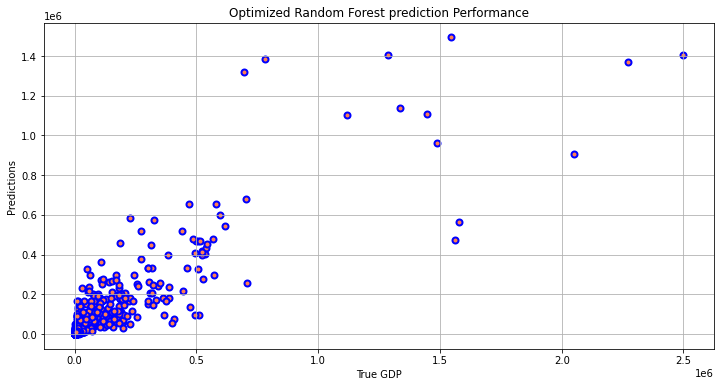

In [72]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,rf_grid_predictions, linewidths=2, edgecolors='b', color='coral')
plt.xlabel('True GDP') 
plt.ylabel('Predictions') 
plt.title('Optimized Random Forest prediction Performance') 
plt.grid()
plt.show()

**COMPARISION B/W THE DIFF. MODELS**

In [68]:
sns.lmplot(x='')